# 导入包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.tsa as tsa
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读入数据
- 对数据进行读入操作
- 对数据进行异常值清洗
- 观测数据
## 对数据进行读入操作

In [15]:
# 读取 Excel 文件

data = pd.read_excel('E:\毕设文件\DeepLearning\Time_Series\data\experment_02\Carbon_Dioxide_Emissions_From_Energy_Consumption-_Electric_Power_Sector.xlsx')

# 更改数据框中的日期列为 datetime 类型
data['Month'] = pd.to_datetime(data['Month'])

# 显示数据框的基本信息，包括数据类型、非空值数量等
data.info()

# 显示数据框的前三行数据，以查看前几行的样本
data.head(3)

# 显示数据框的尾部三行数据，以查看数据的末尾部分
data.tail(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Month                                                                                       576 non-null    datetime64[ns]
 1   Coal Electric Power Sector CO2 Emissions                                                    576 non-null    float64       
 2   Natural Gas Electric Power Sector CO2 Emissions                                             576 non-null    float64       
 3   Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  576 non-null    float64       
 4   Petroleum Coke Electric Power Sector CO2 Emissions                                          576 non-null    float64       

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
573,2020-10-01,61.385,52.159,0.292,0.374,0.396,1.062,0.035,0.904,115.546
574,2020-11-01,62.245,41.947,0.267,0.604,0.341,1.212,0.034,0.875,106.314
575,2020-12-01,78.821,47.734,0.319,0.802,0.365,1.486,0.035,0.904,128.981


## 数据清洗
### 数据存在缺失利用Key_List将data分为df1和df2

In [3]:
# 定义要删除的列名列表
key_list = ['Geothermal Energy Electric Power Sector CO2 Emissions', 'Non-Biomass Waste Electric Power Sector CO2 Emissions']

# 从数据框中删除指定列
df1 = data[data.keys().drop(key_list)]

# 显示删除指定列后的前几行数据
df1.head()

# 从数据框 df2 中选择指定列
df2 = data[key_list]

# 删除包含字符串 "Not Available" 的行
df2 = df2.drop(df2[df2.values == "Not Available"].index)

# 将数据框 df2 的数据类型转换为浮点数类型
df2 = df2.astype(np.float64)

# 显示处理后的数据框 df2 的前几行数据
df2.head()


,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions
192,0.031,0.371
193,0.028,0.335
194,0.031,0.371
195,0.030,0.359
196,0.031,0.371


# 数据的可视化处理

Index(['Geothermal Energy Electric Power Sector CO2 Emissions', 'Non-Biomass Waste Electric Power Sector CO2 Emissions'], dtype='object')


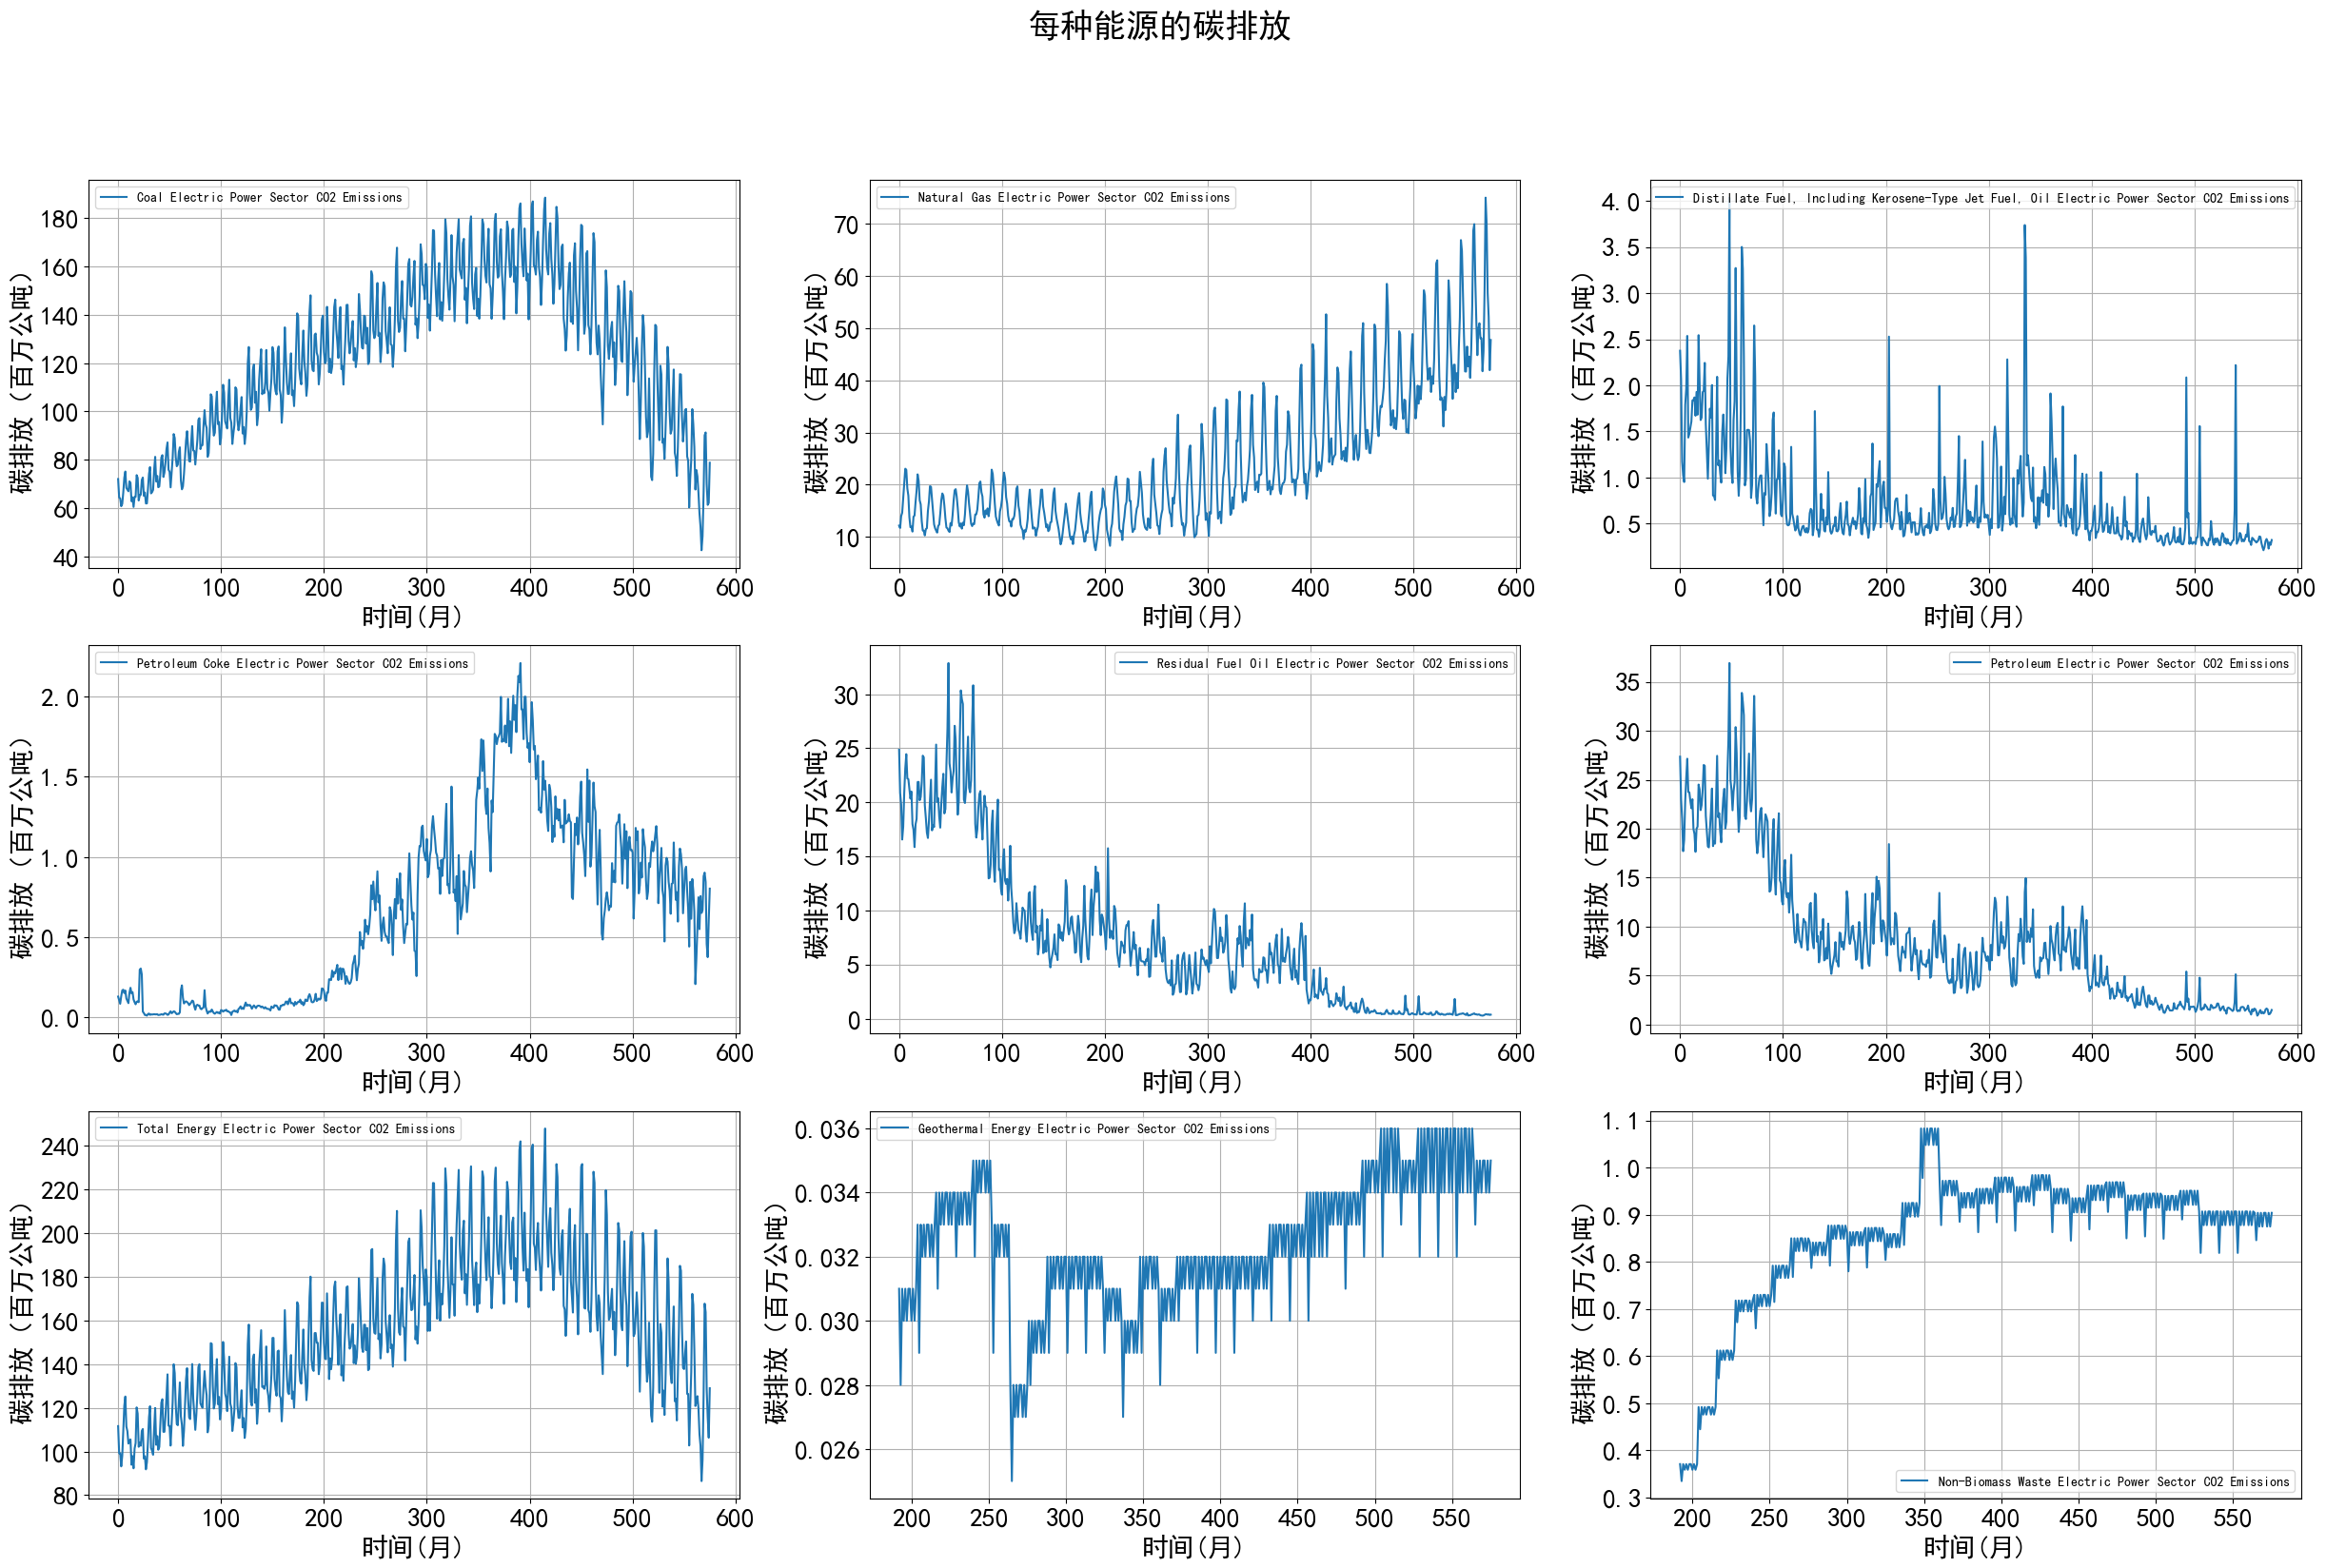

In [4]:
# 创建一个包含3x3子图的图形，指定图形的大小
fig, ax = plt.subplots(3, 3, figsize=(30, 18))

# 将子图对象展平为一维数组
axes = ax.flatten()

# 设置整个图形的标题
fig.suptitle("每种能源的碳排放", fontsize=25)

# 获取数据框 df1 的列名
keys1 = df1.keys()

# 遍历 df1 的列
for key_index in range(len(keys1)):
    if key_index == 0:
        continue  # 跳过第一列（日期列）
    key = keys1[key_index]
    
    # 在子图中绘制 df1 中的数据，设置字体大小
    data[key].plot(ax=axes[key_index-1], fontsize=20)

# 获取数据框 df2 的列名
keys2 = df2.keys()

# 遍历 df2 的列
for key_index in range(len(keys2)):
    key = keys2[key_index]
    
    # 在子图中绘制 df2 中的数据，设置字体大小
    df2[key].plot(ax=axes[key_index+7], fontsize=20)

# 设置子图的 x 轴和 y 轴标签，图例位置，以及网格显示
for index in axes:
    index.set_xlabel("时间(月)", fontsize=20)
    index.set_ylabel("碳排放（百万公吨）", fontsize=20)
    index.legend(loc='best')
    index.grid()

# 将数据框中的 'Month' 列转换为日期时间类型
data['Month'] = pd.to_datetime(data['Month'])
df2['Month'] = data['Month']

# 将 'Month' 列设置为数据框的索引


# 绘制柱状图

Geothermal Energy Electric Power Sector CO2 Emissions                                            12.417
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      245.421
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           328.774
Petroleum Coke Electric Power Sector CO2 Emissions                                              369.868
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          1702.568
Petroleum Electric Power Sector CO2 Emissions                                                  2317.859
Natural Gas Electric Power Sector CO2 Emissions                                               11523.102
Coal Electric Power Sector CO2 Emissions                                                      56704.091
Total Energy Electric Power Sector CO2 Emissions                                              70886.245
dtype: float64


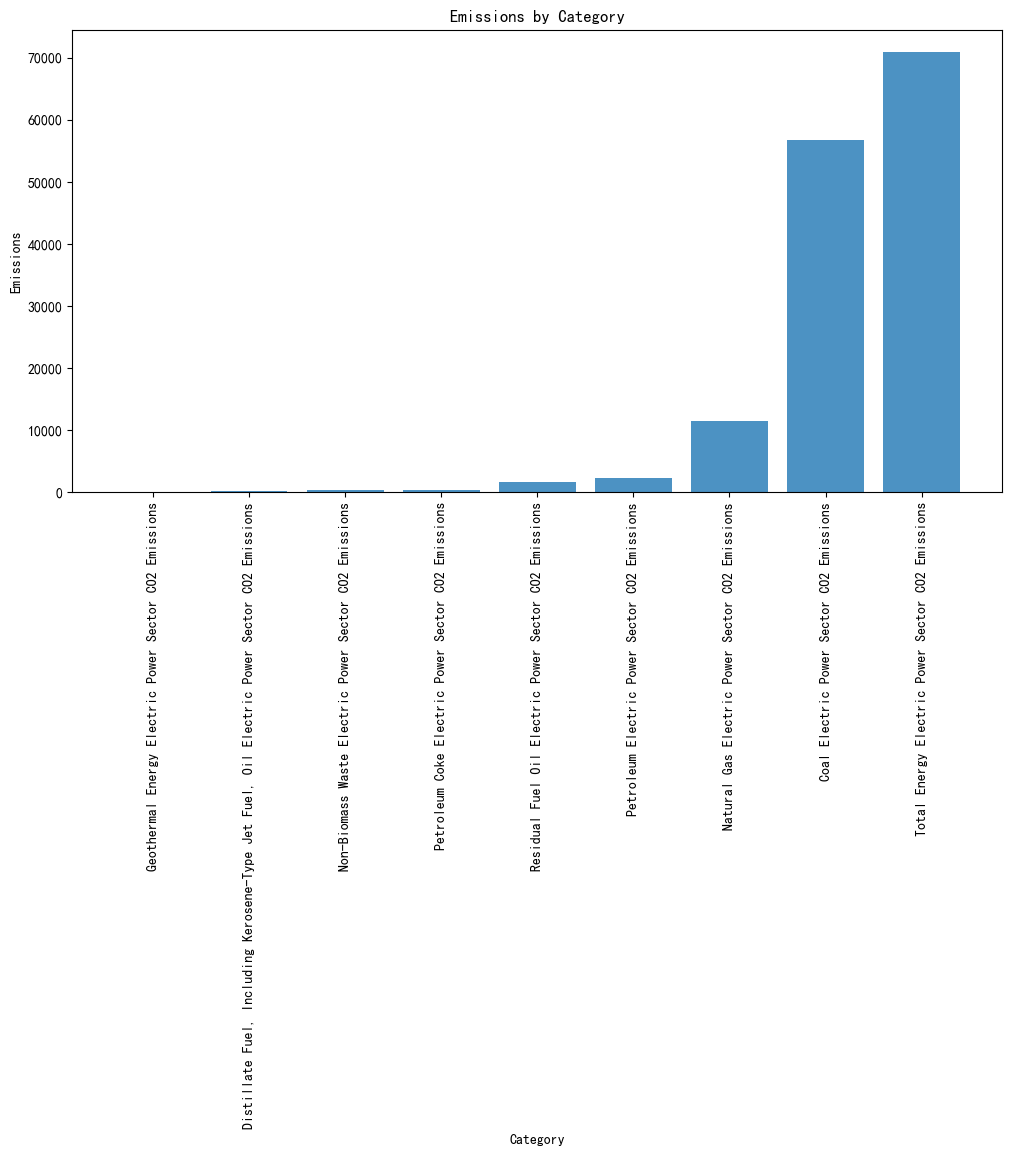

In [5]:
# 从 df2 中提取特定日期范围内的 CO2 排放数据，并对其求和
co2 = df2['1986-01-01':].sum()

# 从 df1 中提取特定日期范围内的 CO2 排放数据，并对其求和，然后合并到之前的数据中
co2 = pd.concat([co2, df1.loc['1986-01-01':].sum()])

# 对合并后的数据按值进行排序
co2 = co2.sort_values()

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(co2.index, co2.values, align='center', alpha=0.8)

# 设置 x 轴标签旋转角度
plt.xticks(rotation=90)

# 设置 x 轴标签
plt.xlabel('Category')

# 设置 y 轴标签
plt.ylabel('Emissions')

# 设置图形标题
plt.title('Emissions by Category')

# 显示图形
plt.show()


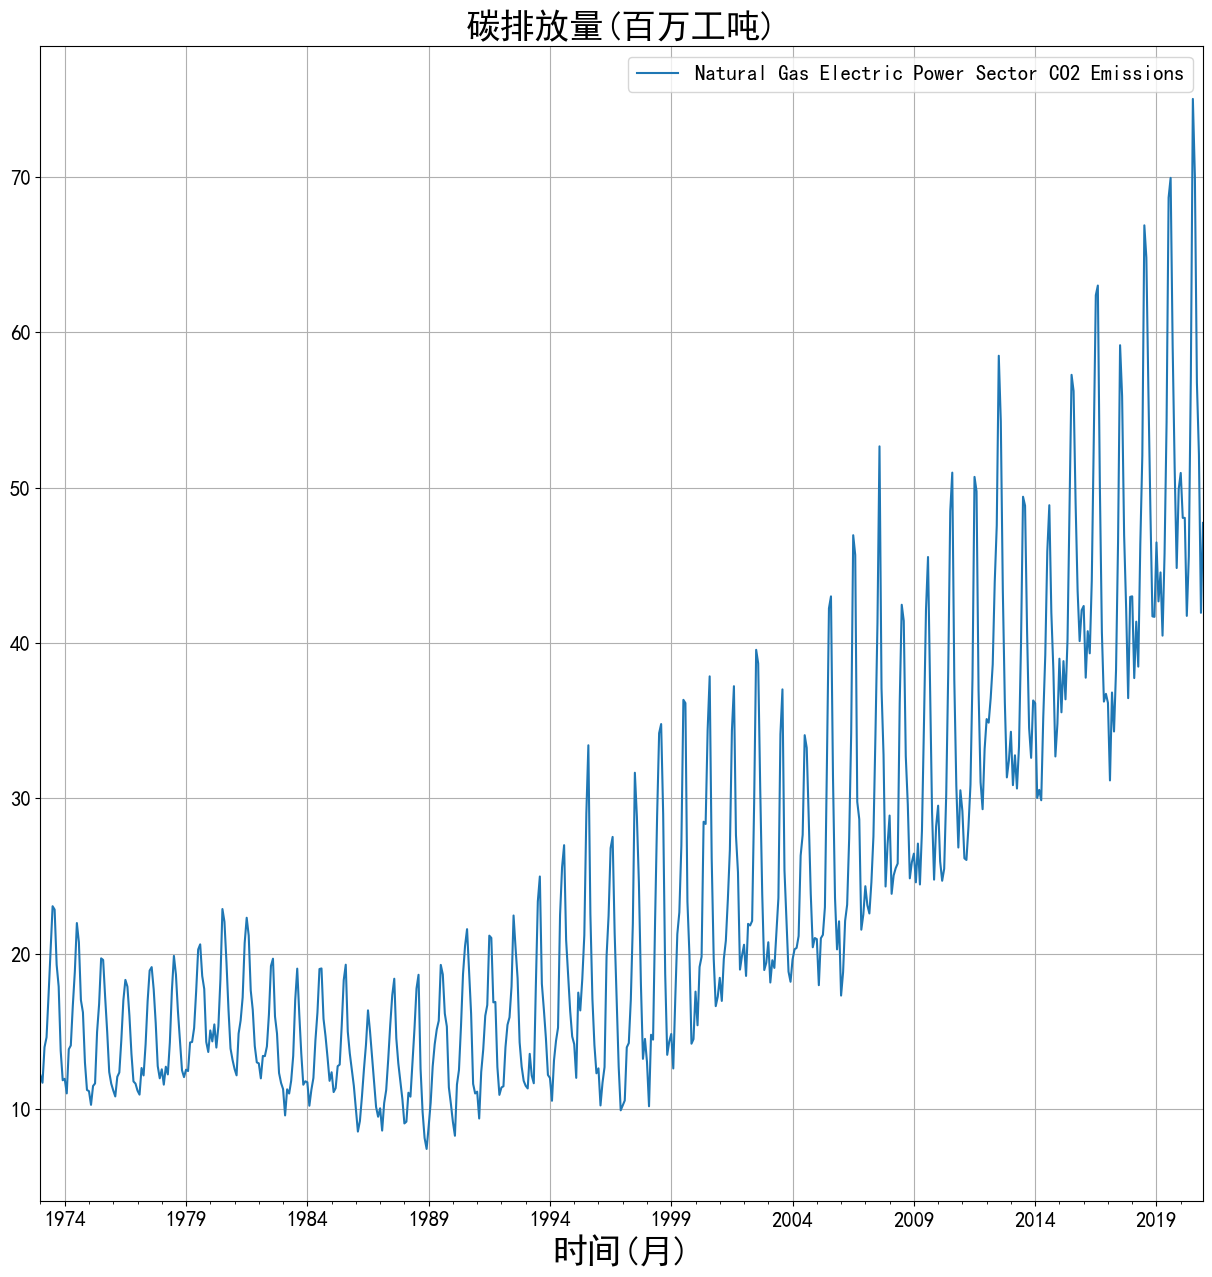

In [6]:
# 从数据框 df1 中提取名为 'Natural Gas Electric Power Sector CO2 Emissions' 的时间序列数据
NGE = df1['Natural Gas Electric Power Sector CO2 Emissions']

# 创建一个图形对象和一个坐标轴对象
fig, ax = plt.subplots(figsize=(15, 15))

# 绘制天然气炭排放量的时间序列图
NGE.plot(ax=ax, fontsize=15)

# 设置图形标题和坐标轴标签
ax.set_title("天然气炭排放量", fontsize=25)
ax.set_xlabel("时间(月)", fontsize=25)
ax.set_ylabel("碳排放量(百万工吨)", fontsize=25)

# 添加图例并设置图例位置
ax.legend(loc='best', fontsize=15)

# 添加网格线
ax.grid()


#确认季节性和平稳性
##确认季节性

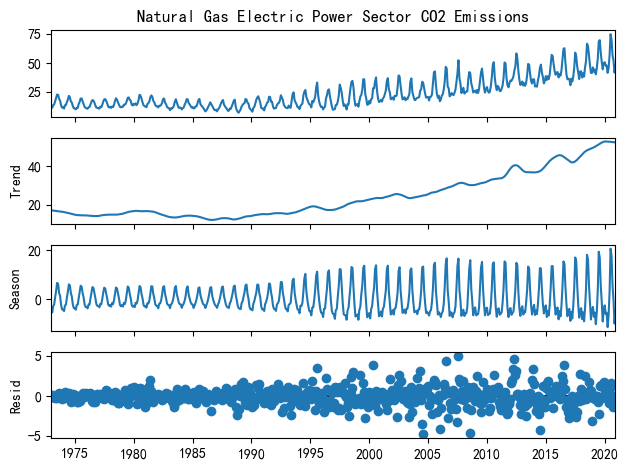

Test Statistic                  1.199387
p-value                         0.995982
#Lag Used                      15.000000
Number of Observation Used    560.000000
Critical Value (1%)            -3.442081
Critical Value (5%)            -2.866715
Critical Value (10%)           -2.569526
dtype: float64
{'1%': -3.442081300525009, '5%': -2.8667149792729596, '10%': -2.569526100127551}
不是平稳的


False

In [7]:
# 导入所需的库
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

# 使用STL分解对时间序列数据进行分解
res = STL(NGE).fit()

# 绘制STL分解结果的图形
res.plot()
plt.show()

# 获取STL分解的趋势、季节性和残差部分
trend = res.trend
seasonal = res.seasonal
residual = res.resid

# 定义平稳性检验函数
def test_stationarity(timeseries, alpha=1e-3):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lag Used', 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print(dftest[4])
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:
        print("X 是平稳的")
        return True
    else:
        print("不是平稳的")
        return False

# 对STL分解后的残差部分进行平稳性检验
test_stationarity(NGE)


## 平稳性检测

In [8]:
# 进行一阶差分
nge_diff1 = NGE.diff(1)

# 进行12步季节性差分
nge_seasonal = nge_diff1.diff(12)

# 调用之前定义的平稳性检验函数 test_stationarity
test_stationarity(nge_seasonal.dropna())


Test Statistic               -9.874391e+00
p-value                       3.917473e-17
#Lag Used                     1.200000e+01
Number of Observation Used    5.500000e+02
Critical Value (1%)          -3.442296e+00
Critical Value (5%)          -2.866809e+00
Critical Value (10%)         -2.569576e+00
dtype: float64
{'1%': -3.442295604706236, '5%': -2.866809328264463, '10%': -2.569576376859504}
X 是平稳的


True

## 噪声检验

In [9]:
# 导入进行白噪声检测的函数
import statsmodels.api as sm

# 定义白噪声检测函数
def test_white_noise(data):
    return sm.stats.acorr_ljungbox(data.dropna(), return_df=True)

# 调用白噪声检测函数并传入时间序列数据 nge_seasonal
test_white_noise(nge_seasonal)


,lb_stat,lb_pvalue
1,23.870831,1.030210e-06
2,49.820562,1.519156e-11
3,53.409396,1.499548e-11
4,53.468006,6.801155e-11
5,53.853807,2.245943e-10
6,53.858783,7.877041e-10
7,55.885971,9.949007e-10
8,55.896232,2.955186e-09
9,55.898658,8.207141e-09
10,68.636542,8.122986e-11


小于阈值0.01为非白噪声序列
# 建立SARIMA模型
## 图解法定阶

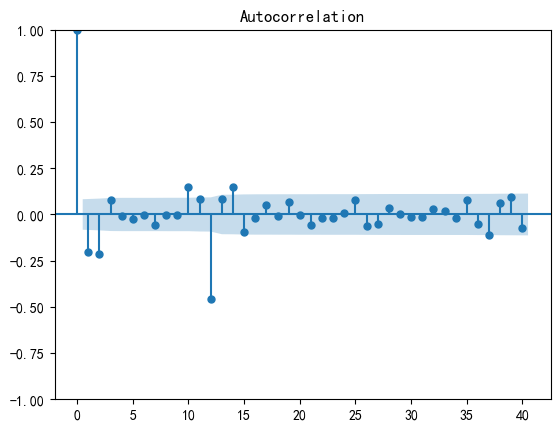

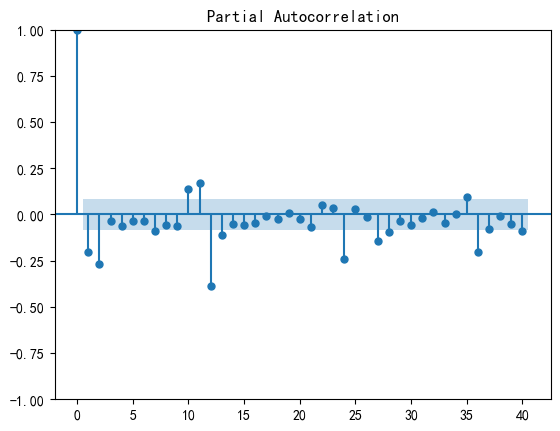

In [10]:
# 导入绘制自相关函数（ACF）和偏自相关函数（PACF）图形的函数
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制时间序列数据的 ACF 图形
fig_acf = plot_acf(nge_seasonal.dropna(), lags=40)
# 绘制时间序列数据的 PACF 图形
fig_pacf = plot_pacf(nge_seasonal.dropna(), lags=40)

# 显示图形
fig_acf.show()
fig_pacf.show()


ACF 二阶截尾
PACF 缓慢拖尾
依照图可得出参数 q = 2 p = 0 s=12 Q=2 P = 0=
## 网格法搜索

In [11]:
# 导入 itertools 库用于生成参数组合
import itertools

# 定义 SARIMA 模型的参数网格搜索函数
def grid_search(data):
    # 定义参数范围
    p = q = range(0, 3)  # AR(p) 和 MA(q) 的阶数范围
    s = [12]  # 季节性周期，这里设定为12，表示季节性每年重复
    d = [1]  # 差分阶数，这里设定为1，表示一阶差分

    # 生成参数组合
    PDQs = list(itertools.product(p, d, q, s))
    pdq = list(itertools.product(p, d, q))

    # 初始化用于存储结果的列表
    params = []
    seasonal_params = []
    results = []

    # 创建一个空的数据框用于存储结果
    grid = pd.DataFrame()

    # 遍历所有参数组合
    for param in pdq:
        for seasonal_param in PDQs:
            # 创建 SARIMA 模型并拟合数据
            mod = tsa.statespace.sarimax.SARIMAX(data, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()

            # 输出每个参数组合的 AIC 值
            print("ARIMA{}x{}-AIC:{}".format(param, seasonal_param, result.aic))

            # 存储参数和对应的 AIC 值
            params.append(param)
            seasonal_params.append(seasonal_param)
            results.append(result.aic)

    # 将参数和结果存储到数据框中
    grid['pdq'] = params
    grid['PDQs'] = seasonal_params
    grid['aic'] = results

    # 找到具有最小 AIC 值的参数组合
    best_params = grid[grid['aic'] == grid['aic'].min()]
    print(best_params)

# 调用参数网格搜索函数并传入时间序列数据 NGE
grid_search(NGE)


ARIMA(0, 1, 0)x(0, 1, 0, 12)-AIC:2597.414372183535
ARIMA(0, 1, 0)x(0, 1, 1, 12)-AIC:2335.745479131162
ARIMA(0, 1, 0)x(0, 1, 2, 12)-AIC:2296.288761768742
ARIMA(0, 1, 0)x(1, 1, 0, 12)-AIC:2424.9482032596925
ARIMA(0, 1, 0)x(1, 1, 1, 12)-AIC:2341.2565241897964
ARIMA(0, 1, 0)x(1, 1, 2, 12)-AIC:2297.7386556525425
ARIMA(0, 1, 0)x(2, 1, 0, 12)-AIC:2342.1329413258945
ARIMA(0, 1, 0)x(2, 1, 1, 12)-AIC:2303.92843151944
ARIMA(0, 1, 0)x(2, 1, 2, 12)-AIC:2299.7382903316266
ARIMA(0, 1, 1)x(0, 1, 0, 12)-AIC:2550.789870535513
ARIMA(0, 1, 1)x(0, 1, 1, 12)-AIC:2306.5856835235945
ARIMA(0, 1, 1)x(0, 1, 2, 12)-AIC:2267.7111264334635
ARIMA(0, 1, 1)x(1, 1, 0, 12)-AIC:2386.2654784367287
ARIMA(0, 1, 1)x(1, 1, 1, 12)-AIC:2311.064874543011
ARIMA(0, 1, 1)x(1, 1, 2, 12)-AIC:2269.2709308581348
ARIMA(0, 1, 1)x(2, 1, 0, 12)-AIC:2310.0259849385384
ARIMA(0, 1, 1)x(2, 1, 1, 12)-AIC:2278.5902872842175
ARIMA(0, 1, 1)x(2, 1, 2, 12)-AIC:2271.270611953827
ARIMA(0, 1, 2)x(0, 1, 0, 12)-AIC:2525.0646427928277
ARIMA(0, 1, 2)x(0, 1

# 建立模型

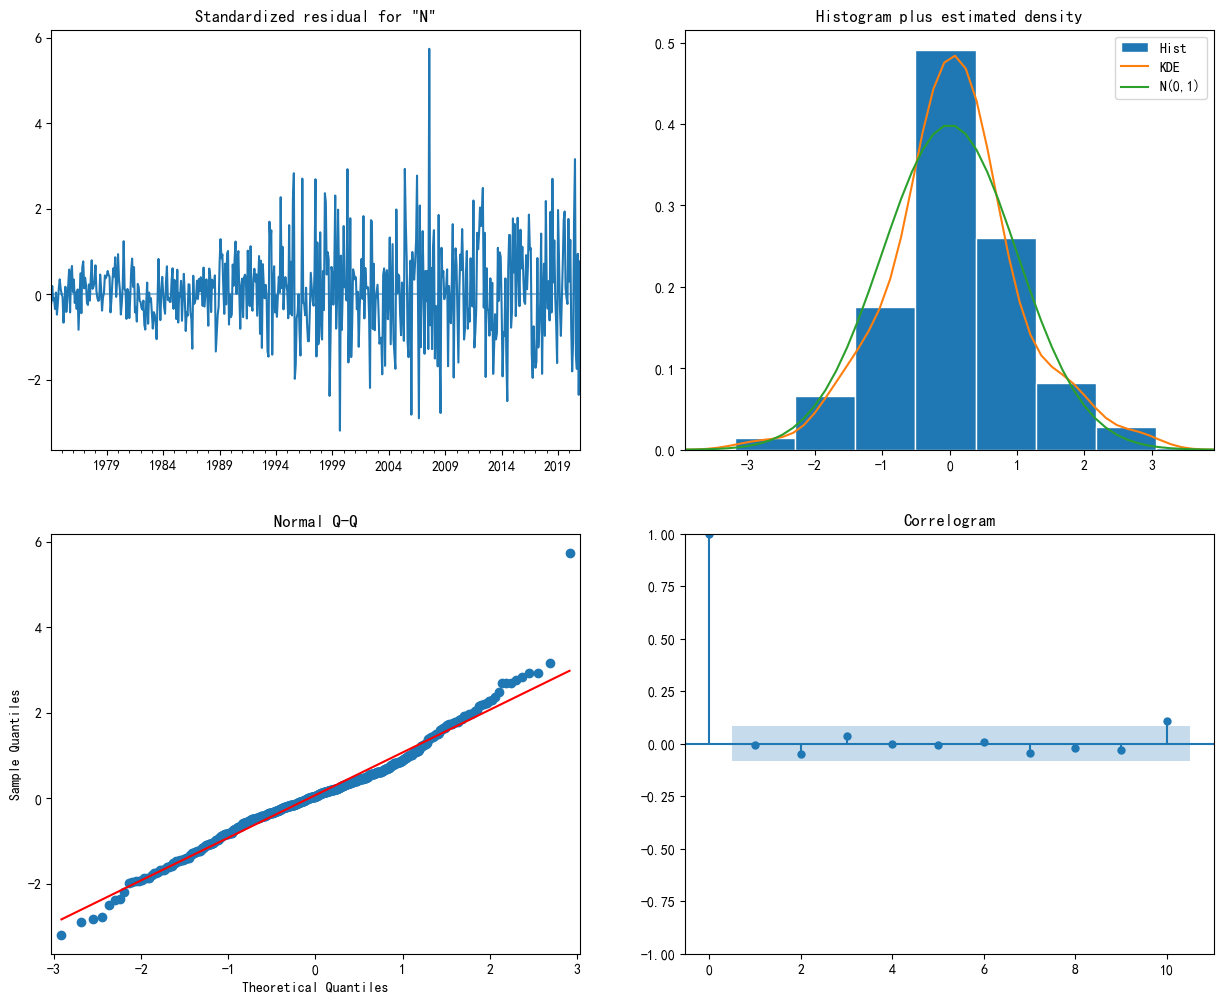

In [12]:
# 导入 SARIMA 模型相关的库
import statsmodels.api as sm
import statsmodels.tsa as tsa

# 创建 SARIMA 模型并拟合数据
mod = tsa.statespace.sarimax.SARIMAX(NGE, order=(1, 1, 2), seasonal_order=(0, 1, 2, 12))
results = mod.fit()

# 进行白噪声检测
def test_white_noise(data):
    return sm.stats.acorr_ljungbox(data.dropna(), return_df=True)

# 调用白噪声检测函数，并输出结果
test_white_noise(results.resid)

# 绘制 SARIMA 模型的诊断图
fig_sesult = results.plot_diagnostics(figsize=(15, 12))


# 模型预测

Month
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
               ...  
2020-08-01    70.021
2020-09-01    56.746
2020-10-01    52.159
2020-11-01    41.947
2020-12-01    47.734
Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 576, dtype: float64
RMSE:5.458383053440003
RMSE:2.3363182688666377
RMSE:41.22120114366814
RMSE:6.420373909957903
单步预测


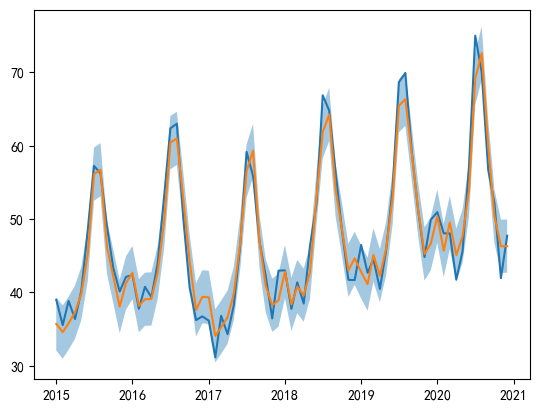

多步预测


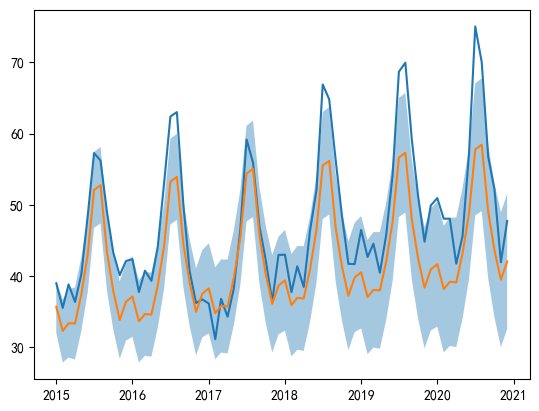

In [13]:
# 导入均方根误差的计算函数
from sklearn.metrics import mean_squared_error

# 定义函数获取 SARIMA 模型的预测结果
def get_prediction(data, results, start, dynamic=False):
    pred = results.get_prediction(start=start, dynamic=dynamic, full_results=True)
    pred_ci = pred.conf_int()
    forecast = pred.predicted_mean
    truth = data[start:]
    pred_concat = pd.concat([truth, forecast, pred_ci], axis=1)
    pred_concat.columns = ['true', 'pred', 'up', 'low']
    rmse = np.sqrt(mean_squared_error(truth, forecast))  # 计算均方根误差
    print('RMSE: {}'.format(rmse))
    return pred_concat

# 获取 SARIMA 模型的预测结果（单步预测）
pres_1 = get_prediction(NGE, results, '2015-01-01')

# 获取 SARIMA 模型的预测结果（多步预测，动态预测）
pres_2 = get_prediction(NGE, results, '2015-01-01', dynamic=True)

# 定义函数绘制预测结果
def plot_prediction(pred_concat):
    plt.fill_between(pred_concat.index, pred_concat['up'], pred_concat['low'], alpha=0.4, label='pred_range')
    plt.plot(pred_concat['true'], label='true')
    plt.plot(pred_concat['pred'], label='pred')
    plt.show()

# 绘制单步预测结果
print("单步预测")
plot_prediction(pres_1)

# 绘制多步预测结果
print("多步预测")
plot_prediction(pres_2)


# 最终预测结果展示


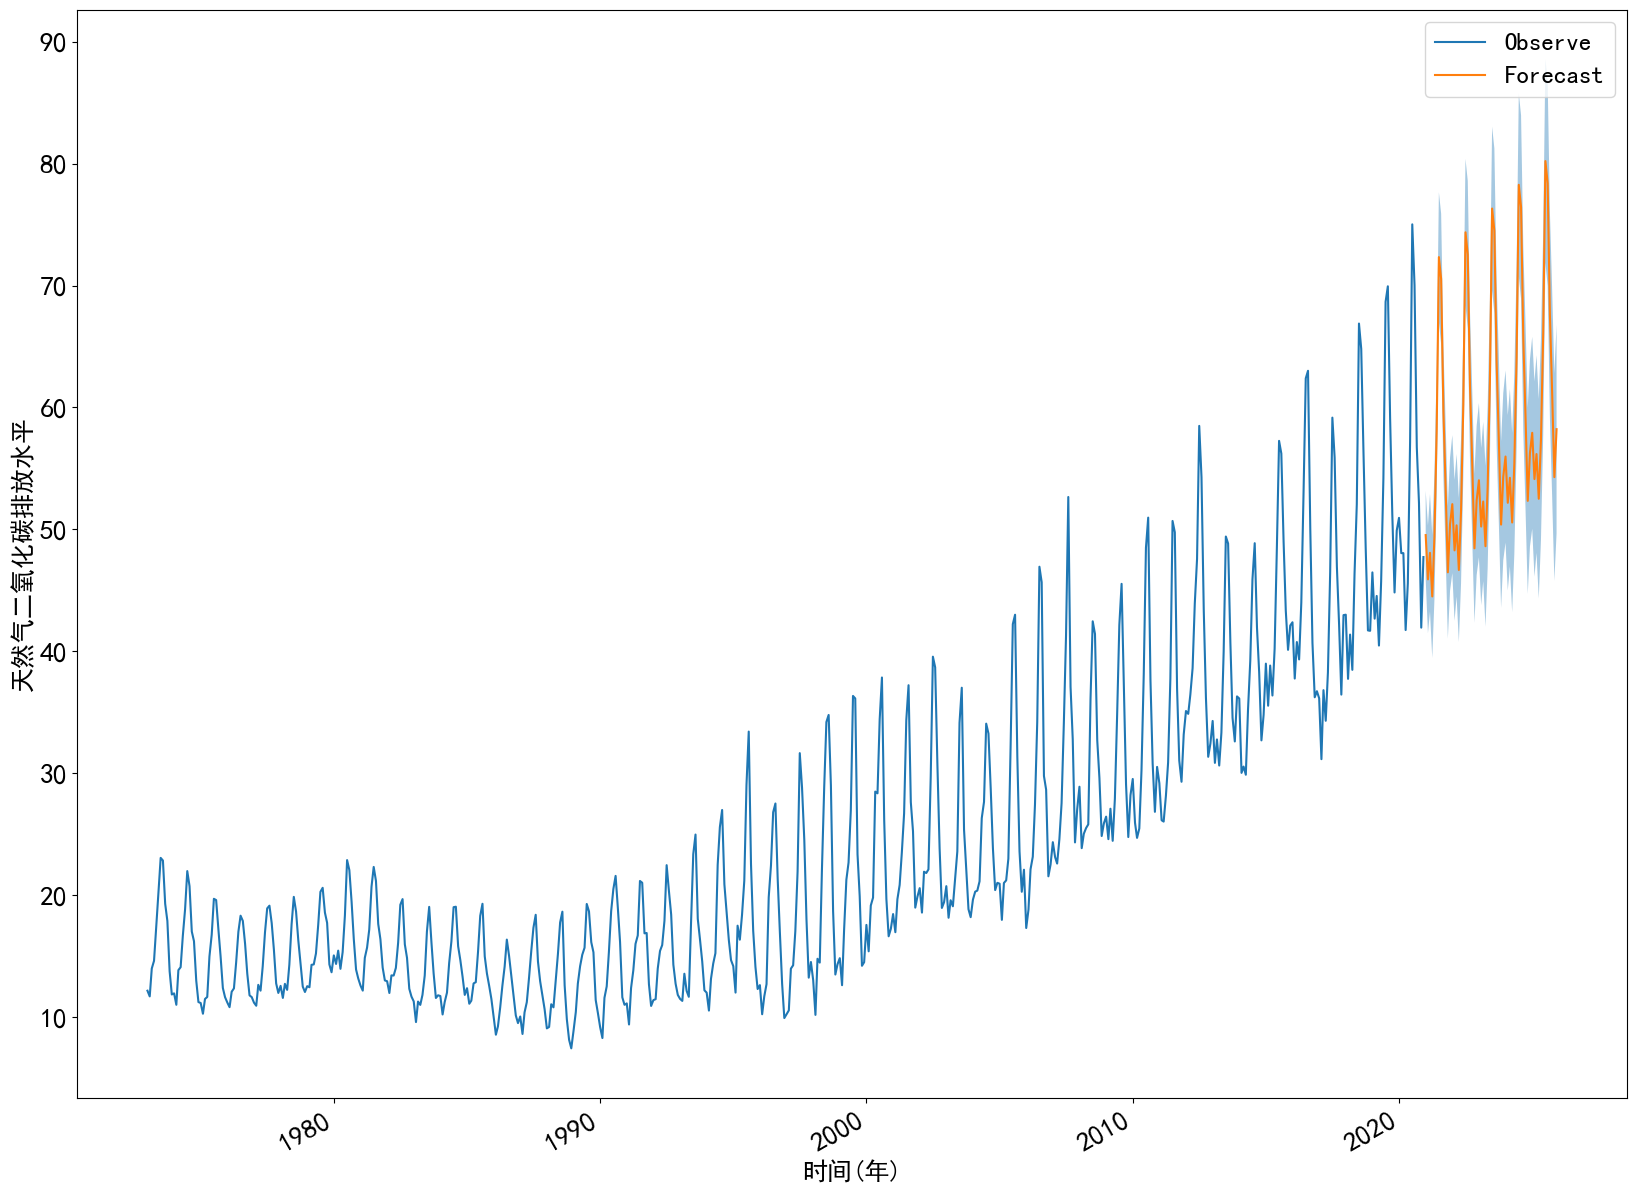

In [14]:
# 获取未来60个时间步的预测值
forecast = results.get_forecast(steps=60)

# 创建绘图
fig, ax = plt.subplots(figsize=(20, 16))

# 绘制观察值
ax.plot(NGE, label='Observe')

# 绘制预测值
forecast.predicted_mean.plot(ax=ax, label='Forecast')

# 填充置信区间
ax.fill_between(forecast.conf_int().index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.4)

# 设置 x 轴和 y 轴标签
ax.set_xlabel("时间(年)", fontsize=18)
ax.set_ylabel("天然气二氧化碳排放水平", fontsize=18)

# 添加图例
ax.legend(loc='best', fontsize=18)

# 设置 x 轴和 y 轴刻度的字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 显示图形
plt.show()
